In [3]:
import io
import cv2
import base64
import requests
from PIL import Image

"""
    To use this example make sure you've done the following steps before executing:
    1. Ensure automatic1111 is running in api mode with the controlnet extension. 
       Use the following command in your terminal to activate:
            ./webui.sh --no-half --api
    2. Validate python environment meet package dependencies.
       If running in a local repo you'll likely need to pip install cv2, requests and PIL 
"""


class ControlnetRequest:
    def __init__(self, url, prompt, path):
        self.url = url
        self.prompt = prompt
        self.img_path = path
        self.body = None

    def build_body(self):
        self.body = {
            "prompt": self.prompt,
            "negative_prompt": "",
            "batch_size": 1,
            "steps": 30,
            "cfg_scale": 7.5,
            "width": 256,
            "height": 256,
            "seed": 42,
            "alwayson_scripts": {
                "controlnet": {
                    "args": [
                        {
                            "enabled": True,
                            "image": self.read_image(),
                            "module": "canny",
                            "model": "control_v11p_sd15_canny [d14c016b]",
                            "resize_mode": 0,
                            "weight": 1.0,
                            "lowvram": False,
                            "control_mode": 0,
                            # "processor_res": 1000,
                            "threshold_a": 100,
                            "threshold_b": 200,
                            "guidance_start": 0.0,
                            "guidance_end": 1.0,
                            "pixel_perfect": True,
                        }
                    ]
                }
            },
        }

    def send_request(self):
        response = requests.post(url=self.url, json=self.body)
        return response.json()

    def read_image(self):
        img = cv2.imread(self.img_path)
        retval, bytes = cv2.imencode(".png", img)
        encoded_image = base64.b64encode(bytes).decode("utf-8")
        return encoded_image

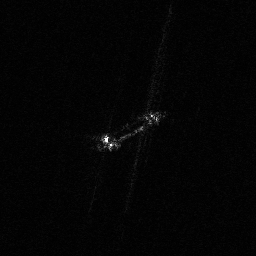

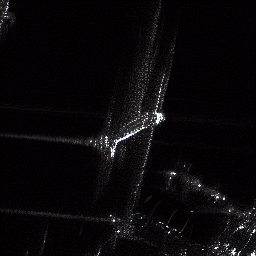

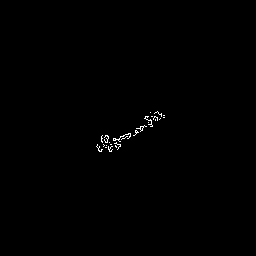

In [4]:
url = "http://localhost:7860/sdapi/v1/txt2img"
path = "/workspace/data/fusrs_v2/vgg_format/dredger/L5_1.png"
prompt = "SAR image of dredger ship, <lora:sar:1.0>"

control_net = ControlnetRequest(url, prompt, path)
control_net.build_body()
output = control_net.send_request()

file_image = Image.open("/workspace/data/fusrs_v2/vgg_format/dredger/L5_1.png")
file_image.show()

result1 = output["images"][0]
image1 = Image.open(io.BytesIO(base64.b64decode(result1.split(",", 1)[0])))
image1.show()

result2 = output["images"][1]
image2 = Image.open(io.BytesIO(base64.b64decode(result2.split(",", 1)[0])))
image2.show()